In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import seaborn as sns  #advanced visualization library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import requests, zipfile, io
import warnings

warnings.filterwarnings('ignore')
data=pd.read_csv("/content/ff.csv",encoding = "ISO-8859-1")
data=data.drop('Unnamed: 0',axis=1)

In [0]:
data.head()

,Solde du compte courant,Durée de crédit (en mois),Historique des crédits,Motif,Montant du crédit,Compte d'épargne / obligations,Employé depuis,Statut personnel et sexe,Autres débiteurs / garants,Résidence actuelle depuis,Age,Logement,Nombre de crédits existants dans cette banque,Emploi,Nombre de personnes à charge,Statut
0,moins que 0,6,compte critique / autres crédits existants (pa...,Télévision,1169,Pas de compte épargne,supérieur 7ans,Homme : Célibataire,Aucun,4,67,Propriétaire,2,Employé/Fonctionnaire,1,Solvable
1,entre 0 et 200,48,crédits déjà remboursés jusqu'à maintenant,Télévision,5951,moins que 100,entre 1 ans et 4ans,: Femme : Divorcée/Mariée,Aucun,2,22,Propriétaire,1,Employé/Fonctionnaire,1,Non solvable
2,pas de compte courant,12,compte critique / autres crédits existants (pa...,Education,2096,moins que 100,entre 4ans et 7ans,Homme : Célibataire,Aucun,3,49,Propriétaire,1,non qualifié - résident,2,Solvable
3,moins que 0,42,crédits déjà remboursés jusqu'à maintenant,fourniture/équipement,7882,moins que 100,entre 4ans et 7ans,Homme : Célibataire,Garant,4,45,Gratuitement,1,Employé/Fonctionnaire,2,Solvable
4,moins que 0,24,retard dans le paiement dans le passé,Voiture,4870,moins que 100,entre 1 ans et 4ans,Homme : Célibataire,Aucun,4,53,Gratuitement,2,Employé/Fonctionnaire,2,Non solvable


In [0]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Statut,0,0.0
Nombre de personnes à charge,0,0.0
Emploi,0,0.0
Nombre de crédits existants dans cette banque,0,0.0
Logement,0,0.0
Age,0,0.0
Résidence actuelle depuis,0,0.0
Autres débiteurs / garants,0,0.0
Statut personnel et sexe,0,0.0
Employé depuis,0,0.0


In [0]:
data.Statut.value_counts()
#Unbalanced data which can lead to biased predictions 

Solvable        700
Non solvable    300
Name: Statut, dtype: int64

In [0]:
!pip install imbalanced-learn

In [0]:
Y=data.Statut
data=data.drop(['Statut'], axis=1)

In [0]:
from imblearn.over_sampling import SMOTENC

smote = SMOTENC(categorical_features=[0,2,3,4,5,6,7,8,11,13])
X_sm, y_sm = smote.fit_sample(data, Y)

In [0]:
balanceddata = pd.DataFrame(data = X_sm
             , columns =data.columns)
balanceddata['Statut']=y_sm
balanceddata.Statut.value_counts()

Non solvable    700
Solvable        700
Name: Statut, dtype: int64

In [0]:
data.columns

Index(['Solde du compte courant', 'Durée de crédit (en mois)',
       'Historique des crédits', 'Motif', 'Montant du crédit',
       'Compte d'épargne / obligations', 'Employé depuis',
       'Statut personnel et sexe', 'Autres débiteurs / garants',
       'Résidence actuelle depuis', 'Age', 'Logement',
       'Nombre de crédits existants dans cette banque', 'Emploi',
       'Nombre de personnes à charge'],
      dtype='object')

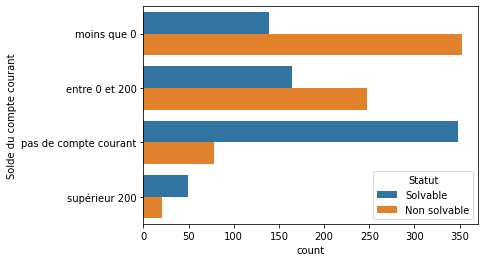

In [0]:
sns.countplot(y='Solde du compte courant',hue='Statut',data=balanceddata)

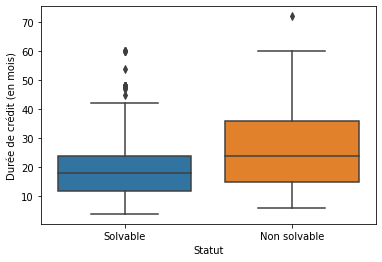

In [0]:
sns.boxplot(x ='Statut', y ='Durée de crédit (en mois)', data = balanceddata)

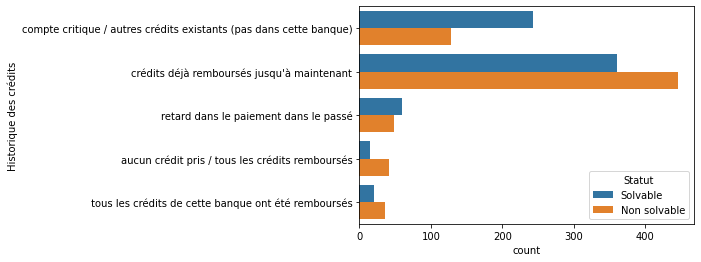

In [0]:
sns.countplot(y='Historique des crédits',hue='Statut',data=balanceddata)

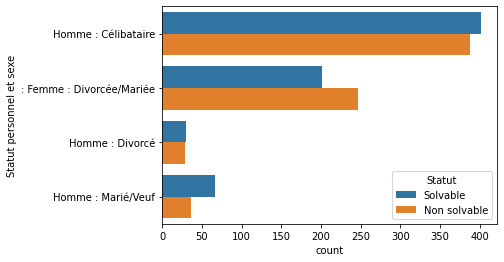

In [0]:
sns.countplot(y='Statut personnel et sexe',hue='Statut',data=balanceddata)

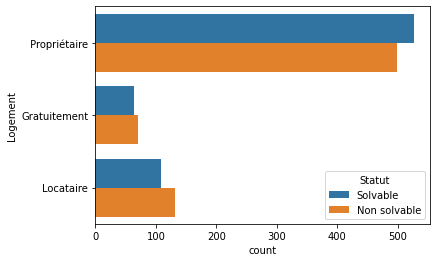

In [0]:
sns.countplot(y='Logement',hue='Statut',data=balanceddata)

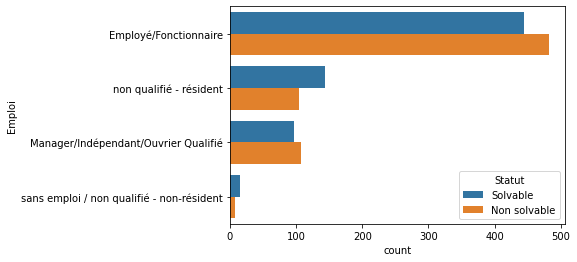

In [0]:
sns.countplot(y='Emploi',hue='Statut',data=balanceddata)

In [0]:
def f(x):
  if  x=="Solvable":
    return 1 
  else :
    return 0 
balanceddata.Statut=balanceddata.Statut.apply(f)



In [0]:
balanceddata.dtypes

Solde du compte courant                          object
Durée de crédit (en mois)                        object
Historique des crédits                           object
Motif                                            object
Montant du crédit                                object
Compte d'épargne / obligations                   object
Employé depuis                                   object
Statut personnel et sexe                         object
Autres débiteurs / garants                       object
Résidence actuelle depuis                        object
Age                                              object
Logement                                         object
Nombre de crédits existants dans cette banque    object
Emploi                                           object
Nombre de personnes à charge                     object
Statut                                            int64
dtype: object

In [0]:
for i in ['Durée de crédit (en mois)','Montant du crédit','Résidence actuelle depuis','Age','Nombre de crédits existants dans cette banque','Nombre de personnes à charge']:
  balanceddata[i]=balanceddata[i].astype(int)  

In [0]:
balanceddata=balanceddata.replace('Voiture ','Voiture')

In [0]:
balanceddata.select_dtypes(exclude=['int']).columns

Index(['Solde du compte courant', 'Historique des crédits', 'Motif',
       'Compte d'épargne / obligations', 'Employé depuis',
       'Statut personnel et sexe', 'Autres débiteurs / garants', 'Logement',
       'Emploi'],
      dtype='object')

In [0]:
from sklearn import preprocessing 
L=[]
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
for i in ['Solde du compte courant', 'Historique des crédits', 'Motif',
       "Compte d'épargne / obligations", 'Employé depuis',
       'Statut personnel et sexe', 'Autres débiteurs / garants', 'Logement',
       'Emploi']:
        balanceddata[i]= label_encoder.fit_transform(balanceddata[i]) 
        L.append(label_encoder.classes_)
# Encode labels in column 'species'. 


In [0]:
L

[array(['entre 0 et 200', 'moins que 0', 'pas de compte courant',
        'supérieur 200'], dtype=object),
 array([' tous les crédits de cette banque ont été remboursés',
        'aucun crédit pris / tous les crédits remboursés',
        'compte critique / autres crédits existants (pas dans cette banque)',
        "crédits déjà remboursés jusqu'à maintenant",
        'retard dans le paiement dans le passé'], dtype=object),
 array(['Appareil électroménager', 'Autres', 'Education',
        'Projet/Education', 'Recyclage (reconversion)', 'Réparation',
        'Télévision', 'Voiture', 'fourniture/équipement'], dtype=object),
 array(['Pas de compte épargne', 'entre 100 et 500', 'entre 500 et 1000',
        'moins que 100', 'supérieur 1000'], dtype=object),
 array(['En chômage', 'entre 1 ans  et 4ans', 'entre 4ans et 7ans',
        'inferieur 1ans', 'supérieur 7ans'], dtype=object),
 array([': Femme : Divorcée/Mariée', 'Homme : Célibataire',
        'Homme : Divorcé', 'Homme : Marié/Veuf'], 

In [0]:
Y=balanceddata.Statut
#balanceddata=pd.get_dummies(balanceddata)
balanceddata=balanceddata.drop(['Statut'], axis=1)

In [0]:
X_train, val_X, Y_train, val_y = train_test_split(balanceddata, Y,random_state=0)

In [0]:
from sklearn.metrics import roc_auc_score,roc_curve , accuracy_score

lr=LogisticRegression()
lr.fit(X_train,Y_train)
preds = lr.predict(val_X)
preds1 = lr.predict(X_train)

val_mae2=accuracy_score(val_y, preds)
val_mae1=accuracy_score(Y_train, preds1)
print(val_mae1)
val_mae2

0.7161904761904762


0.7171428571428572

In [0]:
lr.predict(X_train)

array([0, 0, 0, ..., 0, 0, 1])

In [0]:
lr.predict_proba(X_train)[:,1]

array([0.40163251, 0.14559087, 0.28384081, ..., 0.16289951, 0.31269344,
       0.55336988])

In [0]:
from sklearn.metrics import confusion_matrix
predic = lr.predict(balanceddata)
confusion_matrix(Y,predic)

array([[497, 203],
       [194, 506]])

In [0]:
coefs=pd.DataFrame()
coefs['features']=X_train.columns
coefs['coefs']=lr.coef_[0]
coefs

,features,coefs
0,Solde du compte courant,0.828106
1,Durée de crédit (en mois),-0.047647
2,Historique des crédits,0.060175
3,Motif,-0.031823
4,Montant du crédit,0.000038
5,Compte d'épargne / obligations,-0.478676
6,Employé depuis,-0.098589
7,Statut personnel et sexe,0.264935
8,Autres débiteurs / garants,0.334965
9,Résidence actuelle depuis,0.092400


In [0]:
from sklearn.metrics import roc_auc_score,roc_curve , accuracy_score

RFC=RandomForestClassifier(random_state=90)
RFC.fit(X_train,Y_train)
preds = RFC.predict(val_X)
preds1 = RFC.predict(X_train)

val_mae2=accuracy_score(val_y, preds)
val_mae1=accuracy_score(Y_train, preds1)
print(val_mae1)
val_mae2

1.0


0.8057142857142857

In [0]:
RFC.predict_proba(X_train)[:,1]

array([0.75, 0.04, 0.02, ..., 0.11, 0.11, 0.84])

In [0]:
predic = RFC.predict(balanceddata)
confusion_matrix(Y,predic)

array([[665,  35],
       [ 33, 667]])

In [0]:
coefs=pd.DataFrame()
coefs['features']=X_train.columns
coefs['coefs']=RFC.feature_importances_
coefs

,features,coefs
0,Solde du compte courant,0.170129
1,Durée de crédit (en mois),0.111633
2,Historique des crédits,0.050677
3,Motif,0.063073
4,Montant du crédit,0.130685
5,Compte d'épargne / obligations,0.083111
6,Employé depuis,0.053975
7,Statut personnel et sexe,0.041589
8,Autres débiteurs / garants,0.031169
9,Résidence actuelle depuis,0.048205


In [0]:
balanceddata['probabilty to be accepted']= RFC.predict_proba(balanceddata)[:,1]
balanceddata.head()

,Solde du compte courant,Durée de crédit (en mois),Historique des crédits,Motif,Montant du crédit,Compte d'épargne / obligations,Employé depuis,Statut personnel et sexe,Autres débiteurs / garants,Résidence actuelle depuis,Age,Logement,Nombre de crédits existants dans cette banque,Emploi,Nombre de personnes à charge,probabilty to be accepted
0,1,6,2,6,1169,0,4,1,0,4,67,0,2,0,1,0.95
1,0,48,3,6,5951,3,1,0,0,2,22,0,1,0,1,0.07
2,2,12,2,2,2096,3,2,1,0,3,49,0,1,2,2,0.69
3,1,42,3,8,7882,3,2,1,2,4,45,1,1,0,2,0.77
4,1,24,4,7,4870,3,1,1,0,4,53,1,2,0,2,0.26


In [0]:
import pickle
with open('RFC.pkl', 'wb') as file:
  pickle.dump(RFC, file)